In [1]:
import tensorflow as tf
import time

In [2]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

with tf.Session() as sess:
    result = sess.run(sum_result)
print('result=',result)    

result= 14785.9


In [3]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [4]:
size=500
with tf.device("/cpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [5]:
size=500
with tf.device("/gpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [6]:
def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size],name='W')
        X = tf.random_normal([size, size],name='X')
        mul = tf.matmul(W, X,name='mul')
        sum_result = tf.reduce_sum(mul,name='sum')

    startTime = time.time() 
    tfconfig=tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes=time.time()  - startTime   
    print(device_name," size=",size,"Time:",takeTimes )
    return takeTimes

In [7]:
g=performanceTest("/gpu:0",100)
c=performanceTest("/cpu:0",100)

/gpu:0  size= 100 Time: 0.05301475524902344
/cpu:0  size= 100 Time: 0.06859087944030762


In [8]:
g=performanceTest("/gpu:0",200)
c=performanceTest("/cpu:0",200)

/gpu:0  size= 200 Time: 0.06890130043029785
/cpu:0  size= 200 Time: 0.0997762680053711


In [9]:
g=performanceTest("/gpu:0",1000)
c=performanceTest("/cpu:0",1000)

/gpu:0  size= 1000 Time: 0.10381913185119629
/cpu:0  size= 1000 Time: 0.16930198669433594


In [10]:
g=performanceTest("/gpu:0",5000)
c=performanceTest("/cpu:0",5000)

/gpu:0  size= 5000 Time: 2.038750171661377
/cpu:0  size= 5000 Time: 3.5632834434509277


In [11]:
gpu_set=[];cpu_set=[];i_set=[]
for i in range(0,5001,500):
    g=performanceTest("/gpu:0",i)
    c=performanceTest("/cpu:0",i)
    gpu_set.append(g);cpu_set.append(c);i_set.append(i)
    print("--")

/gpu:0  size= 0 Time: 0.14670062065124512
/cpu:0  size= 0 Time: 0.16228890419006348
--
/gpu:0  size= 500 Time: 0.16929364204406738
/cpu:0  size= 500 Time: 0.18462872505187988
--
/gpu:0  size= 1000 Time: 0.13805508613586426
/cpu:0  size= 1000 Time: 0.13151001930236816
--
/gpu:0  size= 1500 Time: 0.1536424160003662
/cpu:0  size= 1500 Time: 0.2314302921295166
--
/gpu:0  size= 2000 Time: 0.21573805809020996
/cpu:0  size= 2000 Time: 0.4350099563598633
--
/gpu:0  size= 2500 Time: 0.37288379669189453
/cpu:0  size= 2500 Time: 0.6350183486938477
--
/gpu:0  size= 3000 Time: 0.5283641815185547
/cpu:0  size= 3000 Time: 0.9774112701416016
--
/gpu:0  size= 3500 Time: 0.7861192226409912
/cpu:0  size= 3500 Time: 1.4520719051361084
--
/gpu:0  size= 4000 Time: 1.1301662921905518
/cpu:0  size= 4000 Time: 2.030012845993042
--
/gpu:0  size= 4500 Time: 1.5385856628417969
/cpu:0  size= 4500 Time: 2.7173430919647217
--
/gpu:0  size= 5000 Time: 2.0486159324645996
/cpu:0  size= 5000 Time: 3.6564781665802
--


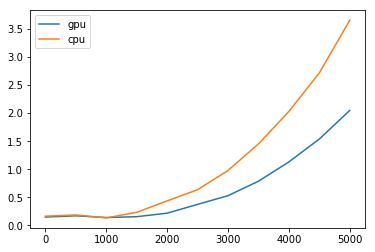

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(i_set, gpu_set, label = 'gpu')
plt.plot(i_set, cpu_set, label = 'cpu')
plt.legend()

In [13]:
#g=performanceTest("/gpu:0",7000)